1. ### Import Libraries

In [1]:
import aeromod as mod
import numpy as np
import matplotlib.pyplot as plt
import csv

2. ### Define FFT Function

In [2]:
def y(x): return 4*np.sin((3*np.pi*x)/9) - 4*np.sin((2*np.pi*x)/7)

def fft(xLow, xHigh, barwidth = 0.02):
    
    numDataPoints = 400
    x = np.linspace(xLow, xHigh, numDataPoints, endpoint=False)
    T = 1/numDataPoints
    
    amp = abs(np.fft.fft(y(x)))[:numDataPoints//2]
    freq = np.fft.fftfreq(numDataPoints, T)[:numDataPoints//2]

    #subplotting
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches([9, 5])

    #plotting
    ax[0].plot(x, y(x))
    ax[0].set_title("Original Function")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    
    ax[1].set_title("FFT")
    ax[1].bar(freq, 2*amp/numDataPoints, width=1)
    ax[1].plot(freq, 2*amp/numDataPoints, '*r')
    ax[1].set_xlim(0, 30)
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_ylabel("Amplitude")
    plt.show()

    return

3. ### Part One A - Finding Goldilocks Interval

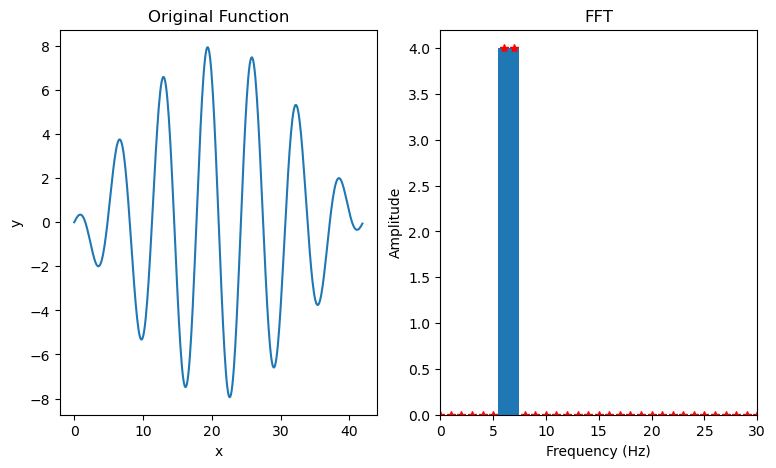

In [3]:
#The interval between 0 and 42 is one complete cyle or 2pi so it gives a clear amplitude
fft(0, 42, barwidth = 0.09)

4. ### Part One B - Finding Bad Interval

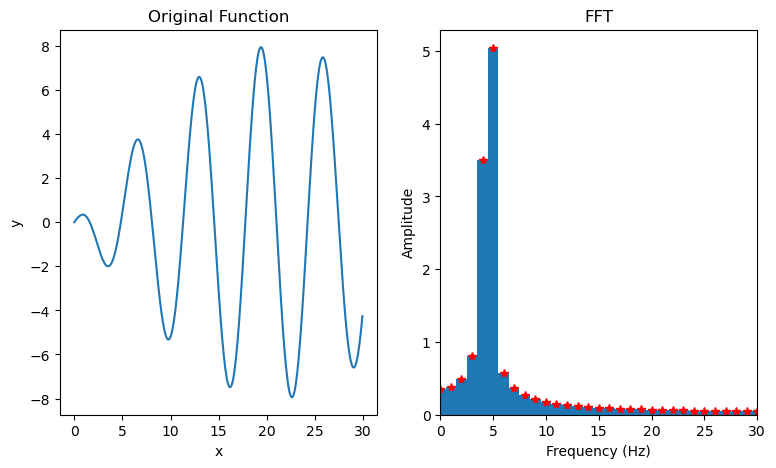

In [4]:
#This one isn't a complete cycle so the data is not clean
fft(0, 30, barwidth = 0.09)

5. ### Part Two A - Plot Microphone 1 for Each 3 Test Runs using SPL Equation

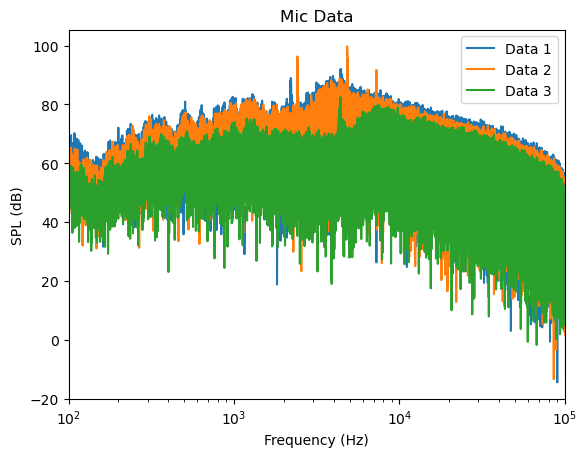

In [5]:
DataOne = np.genfromtxt("CupData1.dat", delimiter=",")[:,4]
DataTwo = np.genfromtxt("CupData2.dat", delimiter=",")[:,4]
DataThree = np.genfromtxt("CupData3.dat", delimiter=",")[:,4]

N = 1024000
T = 5/N

# take ffts of data
fft1 = np.abs(np.fft.fft(DataOne))[:N//2]
fft2 = np.abs(np.fft.fft(DataTwo))[:N//2]
fft3 = np.abs(np.fft.fft(DataThree))[:N//2]

# convert to SPL
spl1 = 20*np.log10((2*(fft1)/N)/(2*(10**-5)))
spl2 = 20*np.log10((2*(fft2)/N)/(2*(10**-5)))
spl3 = 20*np.log10((2*(fft3)/N)/(2*(10**-5)))

# get freqs
freqs = np.fft.fftfreq(N, T)[:N//2]

# plot them
plt.semilogx(freqs, spl1, label="Data 1")
plt.semilogx(freqs, spl2, label="Data 2")
plt.semilogx(freqs, spl3, label="Data 3")
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.title("Mic Data")
plt.xlim([10**2, 10**5])
plt.legend()
plt.show()

6. ### Part Two B - 3 Average Prms Then Use SPL Equation on 1 Plot

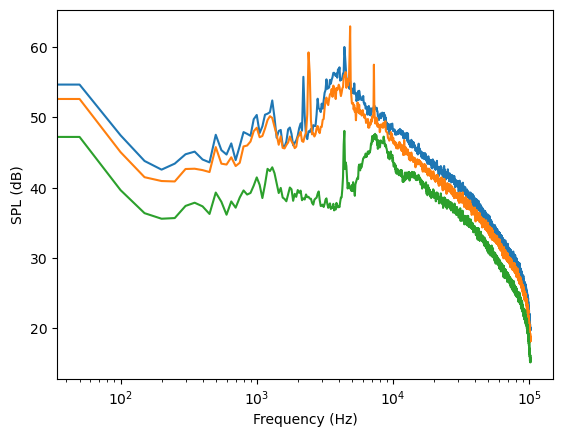

In [7]:
buckets = 250
N = 1024000
n = 1024000//buckets
T = 5/(250*N)

fft1 = np.empty([buckets, n])
fft2 = np.empty([buckets, n])
fft3 = np.empty([buckets, n])
rms1 = np.empty(N)
rms2 = np.empty(N)
rms3 = np.empty(N)

for i in range(0, N, n):
    buck = i//n
    fft1[buck] = 2/N*np.abs(np.fft.fft(DataOne[i:(i+n)]))
    fft2[buck] = 2/N*np.abs(np.fft.fft(DataTwo[i:(i+n)]))
    fft3[buck] = 2/N*np.abs(np.fft.fft(DataThree[i:(i+n)]))

for i in range(n):
    rms1[i] = np.sqrt(np.sum(fft1[:,i]**2)/buckets)
    rms2[i] = np.sqrt(np.sum(fft2[:,i]**2)/buckets)
    rms3[i] = np.sqrt(np.sum(fft3[:,i]**2)/buckets)

spl1 = 20*np.log10(rms1[:n//2]/(2*(10**-5)))
spl2 = 20*np.log10(rms2[:n//2]/(2*(10**-5)))
spl3 = 20*np.log10(rms3[:n//2]/(2*(10**-5)))

freqs = np.fft.fftfreq(N, T)[:n//2]
plt.semilogx(freqs, spl1, label="Data 1")
plt.semilogx(freqs, spl2, label="Data 2")
plt.semilogx(freqs, spl3, label="Data 3")
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.show()